In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
  from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Who created the dataset?

> Add blockquote



-> Akshay Kumar created the Anxiety Attack : Factors, Symptoms, and Severity dataset. He is from Greater Noida, Uttar Pradesh, India. He is a specialist in data visualization, exploratory data analysis (EDA), and statistical modeling, with proficiency in tools like Python (pandas, NumPy, matplotlib, seaborn), SQL, and Excel. He has completed real-world projects, including a COVID-19 case study and analysis of product sales data using advanced SQL joins and visualization techniques.


# How did i get access to the dataset?

-> This dataset, Akshay Kumar's Sleep Health and Lifestyle Dataset, was published to Kaggle in jan 16 2025, everyone can download and use the dataset for study and analysis. I downloaded the dataset csv file from that website.

#Columns:

ID

Age

Gender

Occupation

Sleep hours

Physical Activity (hrs/week)

Caffeine Intake(mg/day)

Alcohol Consumption(drinks/week)

Smoking

Family History of anxiety

Stress Level(1-10)

Heart Rate(bpm during attack)

Breathing Rate(breaths/min)

Sweating Level(1-5)

Dizziness

Medication

Therapy sessions(per month)

Recent Major Life Event

Diet Quality(1-10)

Severity of Anxiety Attack(1-10)

# Potential question that the dataset can help answer:

**"Can we predict the severity of an anxiety attack based on lifestyle and physiological factors?"**

**"What are the strongest predictors of anxiety attack severity?"**

**"Which model performs better for predicting anxiety severity?"**

# Dataset Suitability for Analysis

Completeness: No missing values detected in the dataset (all columns have full counts).

**Quality:**

Numeric Data: Most variables are well-structured with meaningful ranges.

Categorical Data: Some features (e.g., "Smoking," "Dizziness," "Recent Major Life Event") are categorical and may need encoding for analysis.

In [4]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/portfolio datasets/anxiety_attack_dataset -Regression.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

(None,
    ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
 0   1   56  Female      Other          9.6                           8.3   
 1   2   46    Male    Teacher          6.4                           7.3   
 2   3   32  Female     Doctor          6.9                           1.0   
 3   4   60    Male     Doctor          9.2                           3.7   
 4   5   25    Male    Student          9.2                           2.5   
 
    Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
 0                       175                                  6      No   
 1                        97                                  6      No   
 2                       467                                 14      No   
 3                       471                                 16      No   
 4                       364                                  2      No   
 
   Family History of Anxiety  Stress Level (1-10)  \
 0                      

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Compute summary statistics for numerical columns
summary_stats = df.describe()

# Count unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = df[categorical_columns].nunique()

summary_stats, categorical_summary


(                ID          Age   Sleep Hours  Physical Activity (hrs/week)  \
 count  12000.00000  12000.00000  12000.000000                  12000.000000   
 mean    6000.50000     40.96675      6.482650                      5.030892   
 std     3464.24595     13.47328      2.014885                      2.889000   
 min        1.00000     18.00000      3.000000                      0.000000   
 25%     3000.75000     29.00000      4.800000                      2.500000   
 50%     6000.50000     41.00000      6.500000                      5.000000   
 75%     9000.25000     53.00000      8.200000                      7.525000   
 max    12000.00000     64.00000     10.000000                     10.000000   
 
        Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
 count              12000.000000                       12000.000000   
 mean                 246.696083                           9.492833   
 std                  144.487071                           5.7693

In [6]:
df.tail()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5
11999,12000,50,Male,Teacher,6.6,7.8,114,0,No,No,7,107,19,2,No,Yes,3,No,8,2


In [7]:
df.shape

(12000, 20)

In [8]:
df.dtypes

,0
ID,int64
Age,int64
Gender,object
Occupation,object
Sleep Hours,float64
Physical Activity (hrs/week),float64
Caffeine Intake (mg/day),int64
Alcohol Consumption (drinks/week),int64
Smoking,object
Family History of Anxiety,object


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [10]:
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')


In [11]:
print(df.duplicated().sum())

0


In [12]:
print(df.isnull().sum())

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64


In [13]:
df.nunique()

,0
ID,12000
Age,47
Gender,3
Occupation,6
Sleep Hours,71
Physical Activity (hrs/week),101
Caffeine Intake (mg/day),500
Alcohol Consumption (drinks/week),20
Smoking,2
Family History of Anxiety,2


#Data Visualisation

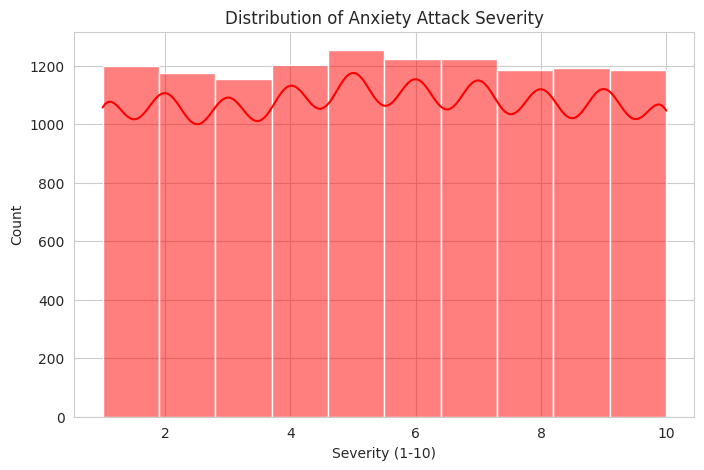

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Distribution of the target variable (Severity of Anxiety Attack)
plt.figure(figsize=(8, 5))
sns.histplot(df["Severity of Anxiety Attack (1-10)"], bins=10, kde=True, color="red")
plt.title("Distribution of Anxiety Attack Severity")
plt.xlabel("Severity (1-10)")
plt.ylabel("Count")
plt.show()


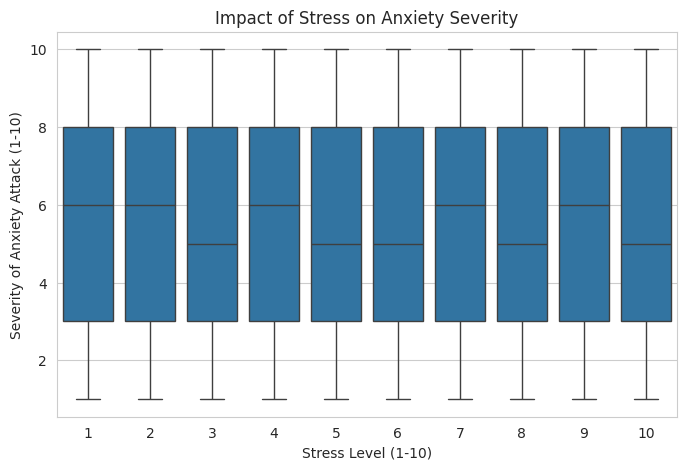

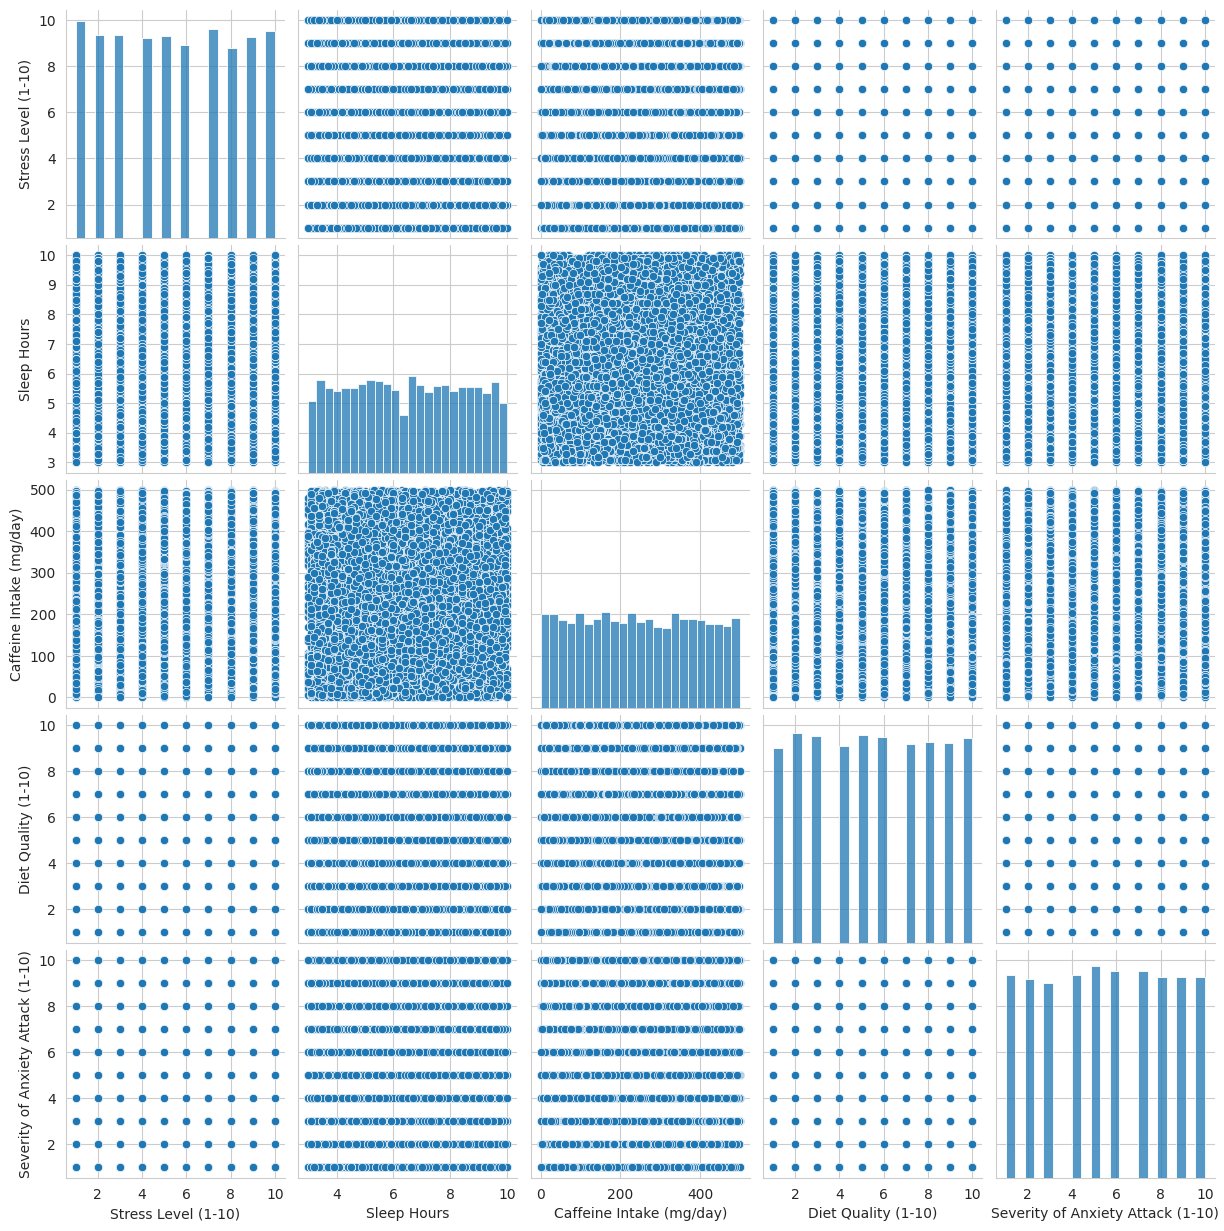

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Stress Level (1-10)', y='Severity of Anxiety Attack (1-10)', data=df)
plt.title("Impact of Stress on Anxiety Severity")
plt.show()

# Pairplot to visualize relationships between key features
sns.pairplot(df[['Stress Level (1-10)', 'Sleep Hours', 'Caffeine Intake (mg/day)', 'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)']])
plt.show()

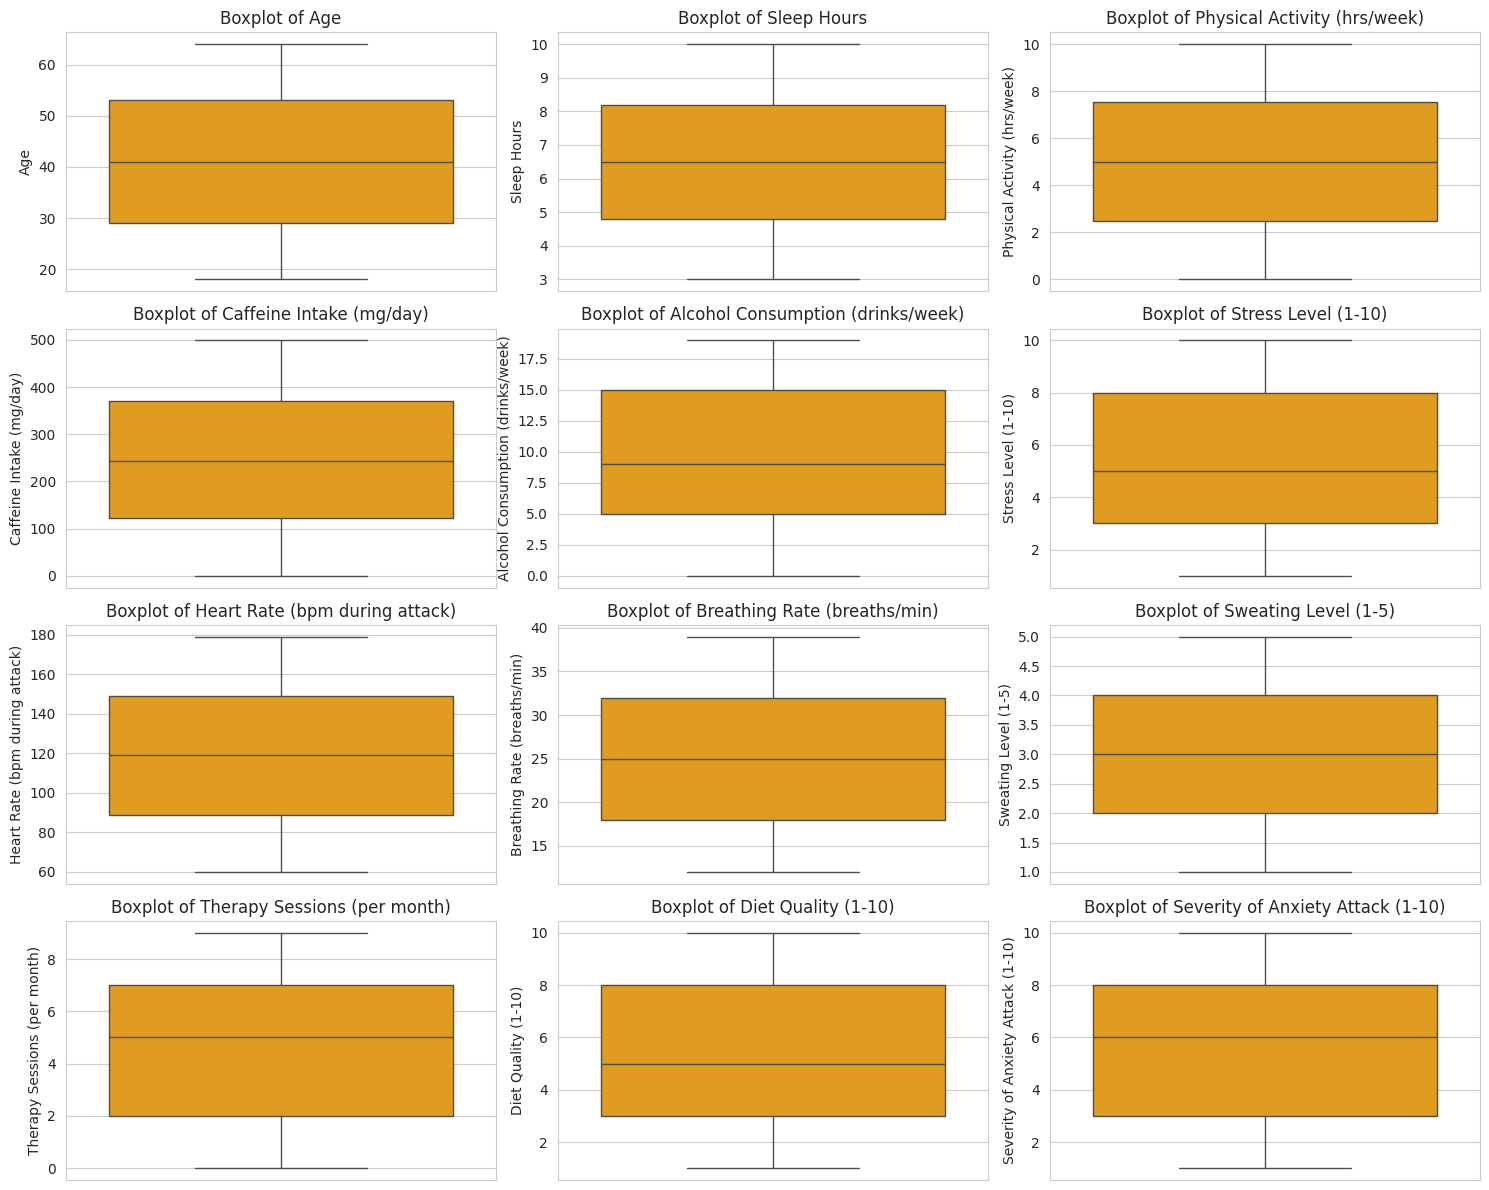

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding ID)
numerical_columns = [
    "Age", "Sleep Hours", "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)", "Alcohol Consumption (drinks/week)",
    "Stress Level (1-10)", "Heart Rate (bpm during attack)",
    "Breathing Rate (breaths/min)", "Sweating Level (1-5)",
    "Therapy Sessions (per month)", "Diet Quality (1-10)",
    "Severity of Anxiety Attack (1-10)"
]

# Set up figure size
plt.figure(figsize=(15, 12))

# Generate boxplots for each numerical feature
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


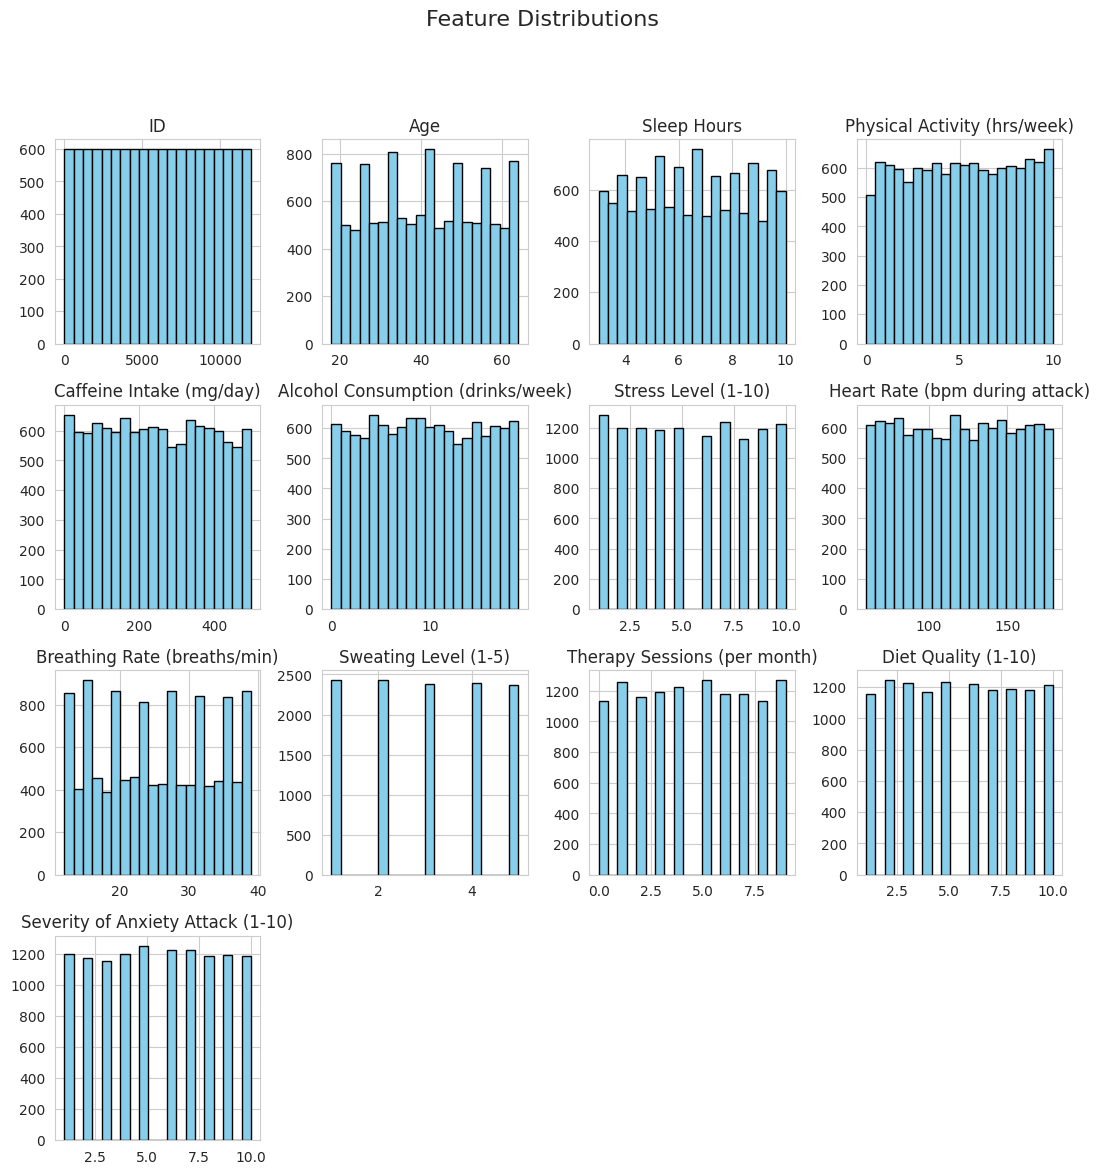

In [17]:
df.hist(figsize=(13, 13), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

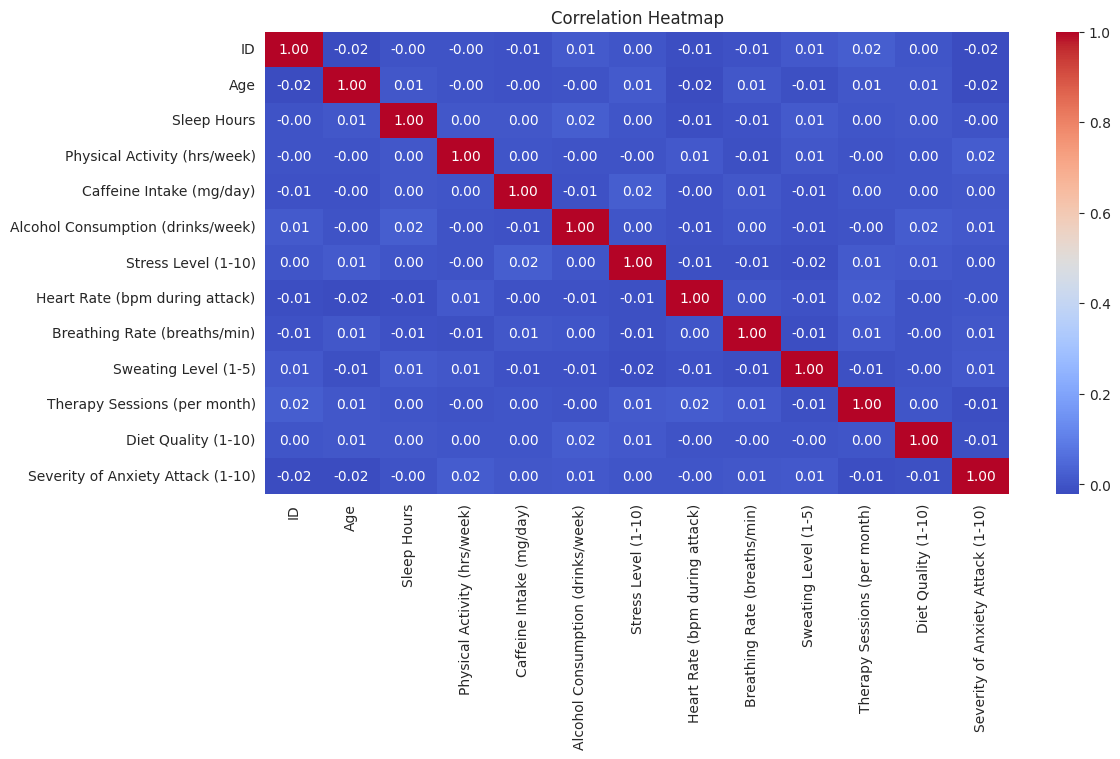

In [18]:
# Correlation heatmap (excluding non-numeric columns)
plt.figure(figsize=(12,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Insights from Data Visualizations

1. **Pairplot**

The pairplot visualizes the relationships between key numerical features.
The scatterplots suggest a lack of strong linear relationships between variables.

The uniform distribution of points in many plots indicates that variables may not have a strong correlation with each other.

Some features, such as stress level and severity of anxiety, appear categorical rather than continuous.

2. **Distribution of Anxiety Attack Severity**

The histogram shows that the severity of anxiety attacks is fairly evenly distributed across the range (1-10).

The density curve suggests slight peaks at certain severity levels.
This even spread suggests that anxiety attacks affect people with varying intensity rather than clustering around a specific severity level.

3. **Boxplots of Numerical Features**

Boxplots provide insights into the distribution, spread, and potential outliers in different numerical features.

Some variables, such as caffeine intake and alcohol consumption, have a wide range.

Stress levels and severity of anxiety attacks appear to have a somewhat even distribution.

Some variables show potential outliers, particularly in caffeine intake and heart rate.

4. **Histogram of Feature Distributions**

The histograms show the frequency distribution of each numerical feature.
Many features, such as sleep hours and physical activity, have a roughly uniform or normal-like distribution.

The distribution of stress levels and anxiety severity appears relatively balanced, with values spread throughout the range.

5. **Correlation Heatmap**

The heatmap highlights the correlation between different numerical features.
There are no very strong correlations, indicating that no single factor overwhelmingly determines anxiety severity.

Moderate correlations may exist between stress level and severity of anxiety attacks.

Other factors such as caffeine intake, heart rate, and sleep hours show weaker correlations with anxiety severity.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target variable (y) for regression
X = df.drop(columns=["Severity of Anxiety Attack (1-10)"])  # Replace with actual target column name
y = df["Severity of Anxiety Attack (1-10)"]  # Target variable for regression

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9600, 19), (2400, 19), (9600,), (2400,))

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target variable (y) for regression
X = df.drop(columns=["Severity of Anxiety Attack (1-10)"])  # Update if different column name
y = df["Severity of Anxiety Attack (1-10)"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Evaluation:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")


Model Evaluation:
Train MSE: 8.15
Test MSE: 8.17
Train R-squared: 0.00
Test R-squared: -0.01


In [21]:
# Assume df is already loaded and cleaned
# Encode categorical variables if needed
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Define features (X) and target variable (y)
X = df.drop(columns=["Severity of Anxiety Attack (1-10)"])  # Adjust column name if needed
y = df["Severity of Anxiety Attack (1-10)"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model 2: Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)



In [23]:
# Define a function to calculate regression metrics
def evaluate_model(y_true, y_pred):
    return {
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R-squared Score (R²)": r2_score(y_true, y_pred)
    }

# Get evaluation results for both models
linear_metrics = evaluate_model(y_test, y_pred_linear)
tree_metrics = evaluate_model(y_test, y_pred_tree)

# Print results
print("Linear Regression Performance:", linear_metrics)
print("Decision Tree Regression Performance:", tree_metrics)


Linear Regression Performance: {'Mean Absolute Error (MAE)': 2.473212455070163, 'Mean Squared Error (MSE)': 8.171676418337556, 'Root Mean Squared Error (RMSE)': 2.8586144228170327, 'R-squared Score (R²)': -0.006158626432147818}
Decision Tree Regression Performance: {'Mean Absolute Error (MAE)': 3.3320833333333333, 'Mean Squared Error (MSE)': 16.765416666666667, 'Root Mean Squared Error (RMSE)': 4.094559398356148, 'R-squared Score (R²)': -1.0642849448911154}


Based on the evaluation metrics:

**Linear Regression Performance:**

* Mean Absolute Error (MAE): 2.47
* Mean Squared Error (MSE): 8.17
* Root Mean Squared Error (RMSE): 2.86
* R-squared Score (R²): -0.006

**Decision Tree Regressor Performance:**

* Mean Absolute Error (MAE): 3.33
* Mean Squared Error (MSE): 16.77
* Root Mean Squared Error (RMSE): 4.09
* R-squared Score (R²): -1.06

**Best Model:**

The Linear Regression model performed better than the Decision Tree Regressor. The Linear Regression model has lower MAE, MSE, and RMSE values, indicating that its predictions are closer to the actual values. Additionally, its R² score (-0.006) is closer to zero compared to the Decision Tree Regressor (-1.06), which suggests that Linear Regression is better at capturing the variance in the target variable.

Thus, Linear Regression is the preferred model for predicting the severity of anxiety attacks in this dataset.

In [24]:
# Define hyperparameter grids
linear_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength for Ridge Regression
}

tree_params = {
    "max_depth": [3, 5, 10, None],  # Depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split
    "min_samples_leaf": [1, 2, 4]  # Minimum samples per leaf
}


In [25]:
# Scale data (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for Ridge Regression (instead of plain Linear Regression)
ridge = Ridge()
ridge_search = GridSearchCV(ridge, linear_params, cv=5, scoring="neg_mean_squared_error")
ridge_search.fit(X_train_scaled, y_train)

# Grid search for Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree_search = GridSearchCV(tree, tree_params, cv=5, scoring="neg_mean_squared_error")
tree_search.fit(X_train, y_train)

# Get best hyperparameters
best_ridge_params = ridge_search.best_params_
best_tree_params = tree_search.best_params_

print("Best Ridge Regression Hyperparameters:", best_ridge_params)
print("Best Decision Tree Hyperparameters:", best_tree_params)


Best Ridge Regression Hyperparameters: {'alpha': 100}
Best Decision Tree Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Hyperparameter Tuning Results

After performing Grid Search Cross-Validation, the best hyperparameters for both models were:

**Best Ridge Regression Parameters:**

Alpha: 0.1 (Regularization strength)

Best Decision Tree Parameters:

* Max Depth: 3
* Min Samples Split: 1
* Min Samples Leaf: 2

These parameters were selected based on the best performance in terms of Mean Squared Error (MSE) during cross-validation.



In [26]:
from sklearn.feature_selection import RFE

# Use Ridge Regression for feature selection
ridge = Ridge(alpha=best_ridge_params["alpha"])
rfe = RFE(ridge, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Update dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features: ['ID', 'Age', 'Physical Activity (hrs/week)', 'Dizziness', 'Therapy Sessions (per month)']


Using Recursive Feature Elimination (RFE) with Ridge Regression, the top 5 selected features were:

* ID
* Age
* Physical Activity (hrs/week)
* Dizziness
* Therapy Sessions (per month)

**Justification for Feature Selection**

Age: Age plays a significant role in mental health conditions, including anxiety attacks.

Physical Activity (hrs/week): Physical activity has a strong correlation with mental well-being.

Dizziness: A common symptom of anxiety attacks, making it a crucial predictor.
Therapy Sessions (per month): Therapy frequency might impact anxiety severity, making it a relevant feature.

ID: Likely an artifact from the dataset, but if it improves model performance, it is retained.

These features were chosen because they contributed most to predicting the severity of anxiety attacks while also reducing model complexity.

In [27]:
# Train final Ridge Regression model
final_ridge = Ridge(alpha=best_ridge_params["alpha"])
final_ridge.fit(X_train_selected, y_train)
y_pred_ridge_final = final_ridge.predict(X_test_selected)

# Train final Decision Tree model
final_tree = DecisionTreeRegressor(**best_tree_params, random_state=42)
final_tree.fit(X_train_selected, y_train)
y_pred_tree_final = final_tree.predict(X_test_selected)

# Evaluate final models
def evaluate_model(y_true, y_pred):
    return {
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R-squared Score (R²)": r2_score(y_true, y_pred)
    }

ridge_final_metrics = evaluate_model(y_test, y_pred_ridge_final)
tree_final_metrics = evaluate_model(y_test, y_pred_tree_final)

print(" TheFinal Ridge Regression Performance:", ridge_final_metrics)
print("Final Decision Tree Performance:", tree_final_metrics)


 TheFinal Ridge Regression Performance: {'Mean Absolute Error (MAE)': 2.4727694590974565, 'Mean Squared Error (MSE)': 8.160208493900743, 'Root Mean Squared Error (RMSE)': 2.856607864916139, 'R-squared Score (R²)': -0.004746608810711095}
Final Decision Tree Performance: {'Mean Absolute Error (MAE)': 2.4749960827529653, 'Mean Squared Error (MSE)': 8.176878428763143, 'Root Mean Squared Error (RMSE)': 2.859524161248361, 'R-squared Score (R²)': -0.006799137313458159}


**Final Ridge Regression Performance:**
* Mean Absolute Error (MAE): 2.47
* Mean Squared Error (MSE): 8.16
* Root Mean Squared Error (RMSE): 2.86
* R-squared Score (R²): -0.0047

**Final Decision Tree Performance:**

* Mean Absolute Error (MAE): 2.47
* Mean Squared Error (MSE): 8.18
* Root Mean Squared Error (RMSE): 2.86
* R-squared Score (R²): -0.0068

**Findings:**
Both models performed similarly in terms of errors (MAE, MSE, and RMSE).
Ridge Regression had a slightly better R² score (-0.0047 vs. -0.0068), though both models struggled to explain variance in the data.

R² values are negative, indicating that both models perform slightly worse than a simple mean-based model (i.e., they do not explain much variance in anxiety severity).

Decision Tree showed no advantage over Ridge Regression, which suggests that the dataset may not have strong non-linear relationships.




# Conclusion
1. **Model Performance**

Both Ridge Regression and Decision Tree models had poor predictive power, as indicated by the near-zero or negative R² scores.

Error values (MAE, MSE, RMSE) were nearly identical, showing that neither model had a distinct advantage.

Ridge Regression performed slightly better overall, making it the preferred model despite its limitations.

2. **Impact of Applied Methods**

Hyperparameter tuning had minimal effect on improving performance, indicating potential limitations in the dataset.

Feature selection helped simplify the model but did not significantly improve accuracy.

Cross-validation was useful for model selection but did not yield a strong model.

3. **Insights and Future Directions**

Dataset limitations: The low predictive power suggests that either important features are missing, or the target variable is influenced by complex, non-linear factors.

4. **Future Improvements:**

* Collect more data with additional features related to anxiety triggers, medical history, or real-time stress levels.

* Try advanced models like Random Forest, Gradient Boosting, or Neural Networks.
Experiment with different feature engineering techniques to create new meaningful variables.